<a href="https://colab.research.google.com/github/bingo-o/DeepLearning/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 查看GPU使用情况

In [ ]:
!nvidia-smi

Thu Nov 18 06:16:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    76W / 149W |    600MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 测试Tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

### 测试Pytorch

In [ ]:
import torch

In [ ]:
torch.cuda.is_available()

True

### 用Pytorch实现线性回归

epoch[20 / 1000], loss: 15.339
epoch[40 / 1000], loss: 10.892
epoch[60 / 1000], loss: 7.749
epoch[80 / 1000], loss: 5.528
epoch[100 / 1000], loss: 3.958
epoch[120 / 1000], loss: 2.849
epoch[140 / 1000], loss: 2.065
epoch[160 / 1000], loss: 1.510
epoch[180 / 1000], loss: 1.119
epoch[200 / 1000], loss: 0.842
epoch[220 / 1000], loss: 0.646
epoch[240 / 1000], loss: 0.508
epoch[260 / 1000], loss: 0.410
epoch[280 / 1000], loss: 0.341
epoch[300 / 1000], loss: 0.292
epoch[320 / 1000], loss: 0.258
epoch[340 / 1000], loss: 0.234
epoch[360 / 1000], loss: 0.216
epoch[380 / 1000], loss: 0.204
epoch[400 / 1000], loss: 0.196
epoch[420 / 1000], loss: 0.189
epoch[440 / 1000], loss: 0.185
epoch[460 / 1000], loss: 0.182
epoch[480 / 1000], loss: 0.180
epoch[500 / 1000], loss: 0.178
epoch[520 / 1000], loss: 0.177
epoch[540 / 1000], loss: 0.177
epoch[560 / 1000], loss: 0.176
epoch[580 / 1000], loss: 0.176
epoch[600 / 1000], loss: 0.175
epoch[620 / 1000], loss: 0.175
epoch[640 / 1000], loss: 0.175
epoch[660 

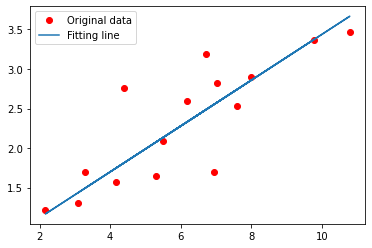

In [ ]:
import torch
from torch import optim, nn
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)


class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        out = self.linear(x)
        return out


model = LinearRegression()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

num_epochs = 1000

for epoch in range(num_epochs):
    out = model(x_train)
    loss = criterion(out, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 20 == 0:
        print("epoch[{} / {}], loss: {:.3f}".format(epoch + 1, num_epochs, loss.item()))

with torch.no_grad():
    y_predict = model(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), "ro", label="Original data")
plt.plot(x_train.numpy(), y_predict.data.numpy(), label="Fitting line")
plt.legend()
plt.show()